In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_csv(r"/content/drive/MyDrive/Internship Aug/PROJECT 2/fraudTest.csv")
train_data.head()

In [ ]:
test_data = pd.read_csv(r"/content/drive/MyDrive/Internship Aug/PROJECT 2/fraudTest.csv")
test_data.head(3)

In [ ]:
train_data = train_data.drop(columns = ["trans_num","Unnamed: 0","trans_date_trans_time","cc_num","merchant","first","last","street","dob"], axis = 1)
test_data = test_data.drop(columns = ["trans_num","Unnamed: 0","trans_date_trans_time","cc_num","merchant","first","last","street","dob"], axis = 1)

In [ ]:
train_data.isnull().sum()

In [ ]:
test_data.isnull().sum()

In [ ]:
encoder = LabelEncoder()
train_data["category"] = encoder.fit_transform(train_data["category"])
train_data["gender"] = encoder.fit_transform(train_data["gender"])
train_data["city"] = encoder.fit_transform(train_data["city"])
train_data["state"] = encoder.fit_transform(train_data["state"])
train_data["job"] = encoder.fit_transform(train_data["job"])


In [ ]:
train_data.head(3)

In [ ]:
test_data["category"] = encoder.fit_transform(test_data["category"])
test_data["gender"] = encoder.fit_transform(test_data["gender"])
test_data["city"] = encoder.fit_transform(test_data["city"])
test_data["state"] = encoder.fit_transform(test_data["state"])
test_data["job"] = encoder.fit_transform(test_data["job"])


In [ ]:
test_data.head(3)

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(train_data.corr(), cmap = "Reds", annot = True, fmt = ".2f")

In [ ]:
sns.set_style("darkgrid")
sns.countplot(data = train_data, x = "gender", hue = "gender")

In [ ]:
y_train = train_data["is_fraud"]
x_train = train_data.drop(["is_fraud"], axis = 1)
y_test = test_data["is_fraud"]
x_test = test_data.drop(["is_fraud"], axis = 1)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

**USING DECISION-TREE**

In [ ]:
dtc = DecisionTreeClassifier(max_depth = 6)
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train), dtc.score(x_test, y_test)

In [ ]:
cf = confusion_matrix(y_test, dtc.predict(x_test))
print(f1_score(y_test, dtc.predict(x_test)))
sns.heatmap(data = cf, annot = True, fmt = "d", cmap = "Blues")

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train), gnb.score(x_test, y_test)

0.2830531576556111


<Axes: >

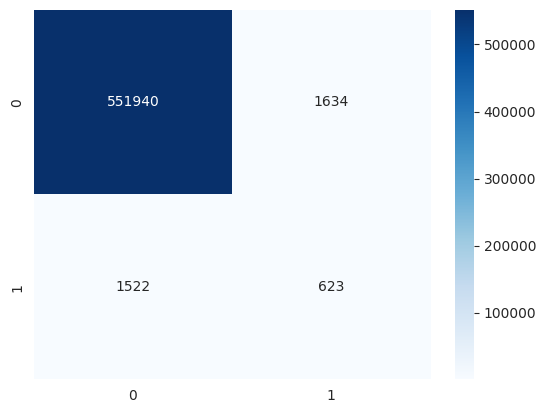

In [ ]:
cf = confusion_matrix(y_test, gnb.predict(x_test))
print(f1_score(y_test, gnb.predict(x_test)))
sns.heatmap(data = cf, annot = True, fmt = "d", cmap = "Blues")

In [ ]:
rfc = RandomForestClassifier(n_estimators = 20)
rfc.fit(x_train, y_train)
rfc.score(x_train, y_train), rfc.score(x_test, y_test)

0.9879745343079462


<Axes: >

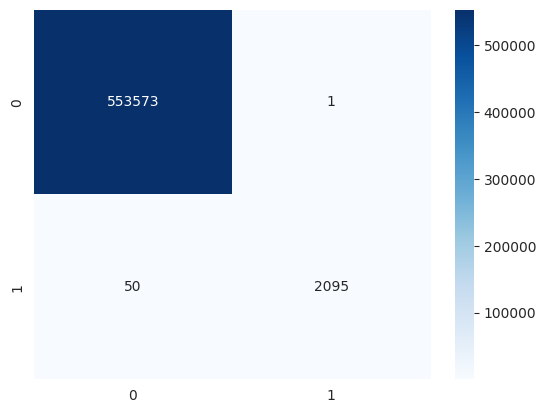

In [ ]:
cf = confusion_matrix(y_test, rfc.predict(x_test))
print(f1_score(y_test, rfc.predict(x_test)))
sns.heatmap(data = cf, annot = True, fmt = "d", cmap = "Blues")

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
knn.score(x_train, y_train), knn.score(x_test, y_test)

(0.9972809999298207, 0.9972809999298207)

0.5488205434458048


<Axes: >

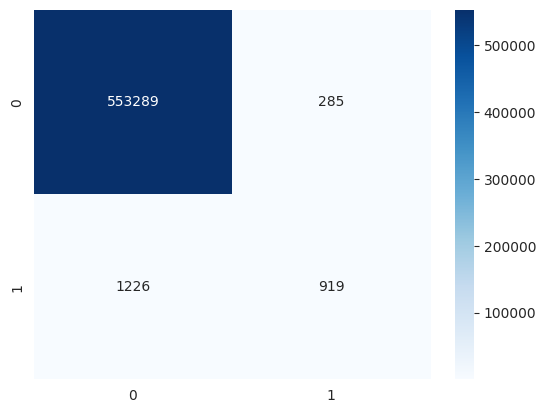

In [ ]:
cf = confusion_matrix(y_test, knn.predict(x_test))
print(f1_score(y_test, knn.predict(x_test)))
sns.heatmap(data = cf, annot = True, fmt = "d", cmap = "Blues")

In [ ]:
svc = SVC(kernel = "rbf")
svc.fit(x_train, y_train)
svc.score(x_train, y_train), svc.score(x_test, y_test)

(0.9961401355721147, 0.9961401355721147)